In [89]:
import pandas as pd
import numpy as np
from losses import rmse_loss, mse_loss
import matplotlib.pyplot as plt

In [90]:
house_dataset = pd.read_csv('../data/ParisHousing.csv')
house_dataset

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [91]:
from sklearn.model_selection import train_test_split
X = house_dataset.copy()
X = X.drop(columns=['price'])
y = house_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
y_train_array = np.array(y_train.values)
y_test_array = np.array(y_test.values)
X_train_array = np.array(X_train.values)
X_test_array = np.array(X_test.values)

In [93]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold
            

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)




X_train = np.array([[1,11], [2,12], [3,13], [4,14], [5,15]])
y_train = np.array([2, 3, 4, 5, 5])
X_test = np.array([[2.5], [3.5]])


tree = CustomDecisionTreeRegressor(max_depth=100000, min_samples_split=1, min_samples=1)
tree.fit(X_train_array, y_train_array)


predictions = tree.predict(X_test_array)
print("Predictions:", predictions)

results = pd.DataFrame({'Actual': y_test_array, 'Predicted': predictions})
print(results)

c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Predictions: [1920816.35 8774909.3  1971114.2  ... 2525784.4   486651.9  5215011.3 ]
         Actual   Predicted
0     1931115.2  1920816.35
1     8769314.1  8774909.30
2     1972219.9  1971114.20
3      827591.0   825221.80
4     3712504.0  3713678.15
...         ...         ...
1995  5710445.3  5719569.50
1996  8840872.2  8837401.10
1997  2531559.1  2525784.40
1998   481620.5   486651.90
1999  5219801.7  5215011.30

[2000 rows x 2 columns]


In [95]:
def create_plots(min_samples_split_list, r2_scores, mse_losses, rmse_losses):

    fig, axs = plt.subplots(3, figsize=(10, 15))
    axs[0].plot(min_samples_split_list, r2_scores, marker='o')
    axs[0].set_title('R^2 score')
    axs[0].set_xlabel('min_samples_split')
    axs[0].set_ylabel('R^2 score')
    axs[0].grid(True)
    axs[1].plot(min_samples_split_list, mse_losses, marker='o')
    axs[1].set_title('MSE loss')
    axs[1].set_xlabel('min_samples_split')
    axs[1].set_ylabel('MSE loss')
    axs[1].grid(True)
    axs[2].plot(min_samples_split_list, rmse_losses, marker='o')
    axs[2].set_title('RMSE loss')
    axs[2].set_xlabel('min_samples_split')
    axs[2].set_ylabel('RMSE loss')
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

In [85]:
max_depth_list = [1, 5, 10, 15, 20, 25,  50, 100]

c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 1======
R^2 score: 0.739813800
MSE loss: 2109472787174.4556
RMSE loss: 1452402.4191574645


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 5======
R^2 score: 0.998961034
MSE loss: 8423467669.094861
RMSE loss: 91779.45123552908


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 10======
R^2 score: 0.999996813
MSE loss: 25834905.100091096
RMSE loss: 5082.80484576096


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 15======
R^2 score: 0.999996870
MSE loss: 25377014.907470178
RMSE loss: 5037.560412289879


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 20======
R^2 score: 0.999996870
MSE loss: 25377014.907470178
RMSE loss: 5037.560412289879


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 25======
R^2 score: 0.999996870
MSE loss: 25377014.907470178
RMSE loss: 5037.560412289879


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 50======
R^2 score: 0.999996870
MSE loss: 25377014.907470178
RMSE loss: 5037.560412289879


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=======MAX DEPTH = 100======
R^2 score: 0.999996870
MSE loss: 25377014.907470178
RMSE loss: 5037.560412289879


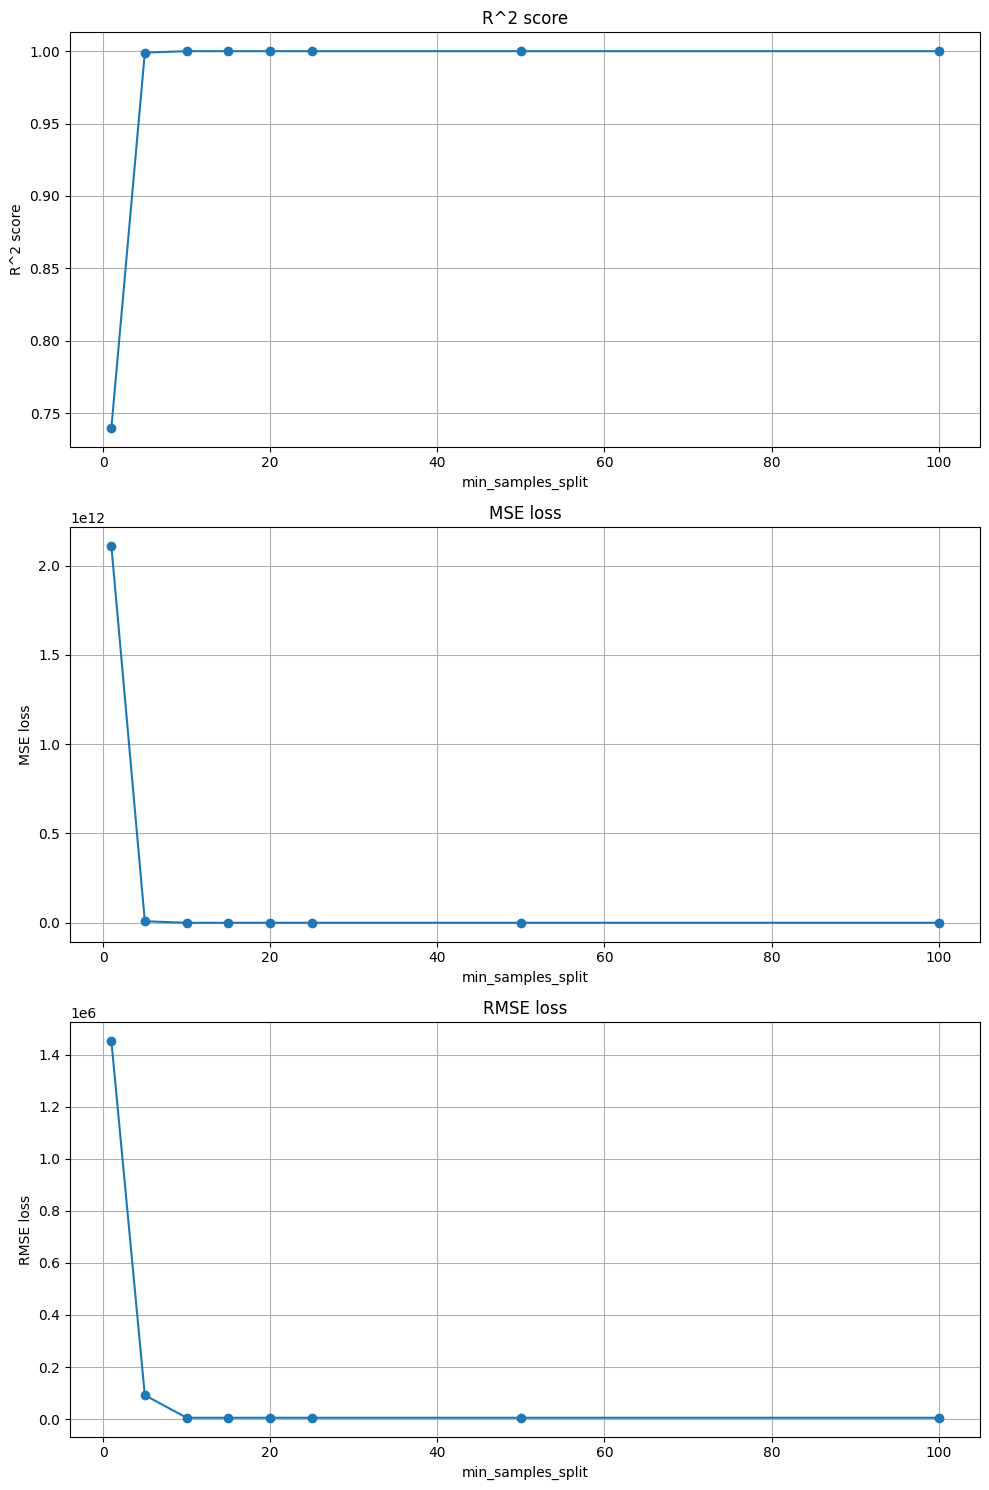

In [96]:
from sklearn.metrics import r2_score

r2_scores = []
mse_losses = []
rmse_losses = []
for max_depth1 in max_depth_list:



    print(f"=======MAX DEPTH = {max_depth1}======")
    tree = CustomDecisionTreeRegressor(max_depth=max_depth1, min_samples_split=10, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    mse = mse_loss(y_test_array, y_pred)
    rmse = rmse_loss(y_test_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse}")
    print(f"RMSE loss: {rmse}")
    r2_scores.append(score)
    mse_losses.append(mse)
    rmse_losses.append(rmse)
create_plots(max_depth_list, r2_scores, mse_losses, rmse_losses)

In [97]:
min_samples_split_list = [2, 5, 10, 15, 25, 50, 100]

In [98]:
for min_samples_split in min_samples_split_list:
    print(f"=======MIN SAMPLES  SPLIT= {min_samples_split}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=min_samples_split, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======MIN SAMPLES  SPLIT= 2======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999996813
MSE loss: 25834905.100091096
RMSE loss: 5082.80484576096
=======MIN SAMPLES  SPLIT= 5======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999996813
MSE loss: 25834905.100091096
RMSE loss: 5082.80484576096
=======MIN SAMPLES  SPLIT= 10======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999996813
MSE loss: 25834905.100091096
RMSE loss: 5082.80484576096
=======MIN SAMPLES  SPLIT= 15======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999995895
MSE loss: 33278927.797838815
RMSE loss: 5768.789110189314
=======MIN SAMPLES  SPLIT= 25======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999992635
MSE loss: 59715652.67900314
RMSE loss: 7727.590353985072
=======MIN SAMPLES  SPLIT= 50======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999979232
MSE loss: 168376207.38473144
RMSE loss: 12975.985796259622
=======MIN SAMPLES  SPLIT= 100======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999933230
MSE loss: 541341059.959249
RMSE loss: 23266.737200545525


In [ ]:
min_samples_leaf_list = [2, 5, 10, 15, 25, 50, 100]

for min_samples_leaf in min_samples_leaf_list:
    print(f"=======MIN SAMPLES  LEAF= {min_samples_leaf}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=min_samples_split, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    y_pred = regressor.predict(X_test)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

In [77]:
sumded = 0
for test, prd in zip(y_test_array,predictions):
  sumded += abs(test-prd)
print(sumded)

9931054.300000023


In [78]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_array, predictions)

print(f"R^2 score: {r2}")

R^2 score: 0.9999948182321369


In [ ]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold
            

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)



X_train = np.array([[1,11], [2,12], [3,13], [4,14], [5,15]])
y_train = np.array([2, 3, 4, 5, 5])
X_test = np.array([[2.5], [3.5]])


tree = CustomDecisionTreeRegressor(max_depth=100000, min_samples_split=1, min_samples=1)
tree.fit(X_train_array, y_train_array)


predictions = tree.predict(X_test_array)
print("Predictions:", predictions)

results = pd.DataFrame({'Actual': y_test_array, 'Predicted': predictions})
print(results)